# Wine_cleaning

In [28]:
# Import dependencies 
import pandas as pd
import unidecode

In [29]:
# Import data
wine_data_df = pd.read_csv("Data/winemag-data-130k-v2.csv")  
print(wine_data_df.shape)
wine_data_df.head()

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Select and keep only US data

In [30]:
# Only keep rows where country = US
US_wine_data_df = wine_data_df.loc[wine_data_df["country"] == "US"]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [31]:
# Drop columns that are not useful: Unnamed: 0, country, taster_name, taster_twitter_handle
US_wine_data_df = US_wine_data_df.drop(columns=["Unnamed: 0", "designation", "region_2","country","taster_name", "taster_twitter_handle"], axis=1)

# Keep California, Washington, and Oregon
WestCoast_wine_data = US_wine_data_df.loc[US_wine_data_df.province.isin(["California","Washington", "Oregon"])]
print(WestCoast_wine_data.shape)
WestCoast_wine_data.head()

(50259, 8)


,description,points,price,province,region_1,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou


## Evaluate data and clean

In [32]:
WestCoast_wine_data_title = WestCoast_wine_data

In [33]:
# Remove the region within the title
WestCoast_wine_data_title ['title'] = WestCoast_wine_data_title['title'].str.replace(r"\(.*\)","") 

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# Remove the state from region
WestCoast_wine_data_title ['region_1'] = WestCoast_wine_data_title['region_1'].str.replace(r"\(.*\)","") 

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# Create a region list
region_list = list(WestCoast_wine_data_title['region_1'])
print(len(region_list))
region_list

50259


['Willamette Valley',
 'Willamette Valley',
 'Napa Valley',
 'Alexander Valley',
 'Central Coast',
 'Oregon',
 'Paso Robles',
 'Sonoma Coast',
 'Clarksburg',
 'Dry Creek Valley',
 'Sonoma Valley',
 'McMinnville',
 'Willamette Valley',
 'Paso Robles',
 'Lake County',
 'Napa Valley',
 'North Coast',
 'Columbia Valley ',
 'Napa Valley',
 'Columbia Valley ',
 'Santa Ynez Valley',
 'Columbia Valley ',
 'California',
 'Columbia Valley ',
 'Alexander Valley',
 'Howell Mountain',
 'Calistoga',
 'Napa Valley',
 'Eola-Amity Hills',
 'Napa Valley',
 'Ancient Lakes',
 'Knights Valley',
 'Sonoma County',
 'Sonoma Coast',
 'Napa Valley',
 'Columbia Valley ',
 'Napa Valley',
 'Santa Clara Valley',
 'Yountville',
 'Paso Robles',
 'Paso Robles',
 'Santa Ynez Valley',
 'Central Coast',
 'Alexander Valley',
 'Rockpile',
 'Napa Valley',
 'Napa Valley',
 'Santa Lucia Highlands',
 'Spring Mountain District',
 'Santa Lucia Highlands',
 'Santa Ynez Valley',
 'Santa Ynez Valley',
 'Monterey',
 'Napa Valley',
 

In [36]:
WestCoast_wine_data_title.head(20)

,description,points,price,province,region_1,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou
21,"A sleek mix of tart berry, stem and herb, alon...",87,20.0,Oregon,Oregon,Acrobat 2013 Pinot Noir,Pinot Noir,Acrobat
23,This wine from the Geneseo district offers aro...,87,22.0,California,Paso Robles,Bianchi 2011 Signature Selection Merlot,Merlot,Bianchi
25,Oak and earth intermingle around robust aromas...,87,69.0,California,Sonoma Coast,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
29,Clarksburg is becoming a haven for Chenin Blan...,86,16.0,California,Clarksburg,Clarksburg Wine Company 2010 Chenin Blanc,Chenin Blanc,Clarksburg Wine Company
33,"Rustic and dry, this has flavors of berries, c...",86,50.0,California,Dry Creek Valley,Envolve 2010 Puma Springs Vineyard Red,Red Blend,Envolve


In [37]:
# Look at dataframe info again.
WestCoast_wine_data_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50259 entries, 2 to 129967
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  50259 non-null  object 
 1   points       50259 non-null  int64  
 2   price        50046 non-null  float64
 3   province     50259 non-null  object 
 4   region_1     50256 non-null  object 
 5   title        50259 non-null  object 
 6   variety      50259 non-null  object 
 7   winery       50259 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.5+ MB


In [38]:
# Drop rows with NaN.  Max rows US =50259
# "price" only has 50046 rows. 
WestCoast_wine_data_title = WestCoast_wine_data_title.dropna()
print(WestCoast_wine_data_title.shape)
WestCoast_wine_data_title.head(20)

(50043, 8)


,description,points,price,province,region_1,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou
21,"A sleek mix of tart berry, stem and herb, alon...",87,20.0,Oregon,Oregon,Acrobat 2013 Pinot Noir,Pinot Noir,Acrobat
23,This wine from the Geneseo district offers aro...,87,22.0,California,Paso Robles,Bianchi 2011 Signature Selection Merlot,Merlot,Bianchi
25,Oak and earth intermingle around robust aromas...,87,69.0,California,Sonoma Coast,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
29,Clarksburg is becoming a haven for Chenin Blan...,86,16.0,California,Clarksburg,Clarksburg Wine Company 2010 Chenin Blanc,Chenin Blanc,Clarksburg Wine Company
33,"Rustic and dry, this has flavors of berries, c...",86,50.0,California,Dry Creek Valley,Envolve 2010 Puma Springs Vineyard Red,Red Blend,Envolve


## Binning Variety, Region 

In [39]:
variety_counts = WestCoast_wine_data_title.variety.value_counts()
variety_counts

Pinot Noir              9686
Cabernet Sauvignon      7104
Chardonnay              6265
Syrah                   3160
Red Blend               2745
                        ... 
Pinot Blanc-Viognier       1
Trebbiano                  1
Siegerrebe                 1
Syrah-Petit Verdot         1
Pinot Auxerrois            1
Name: variety, Length: 226, dtype: int64

<AxesSubplot:ylabel='Density'>

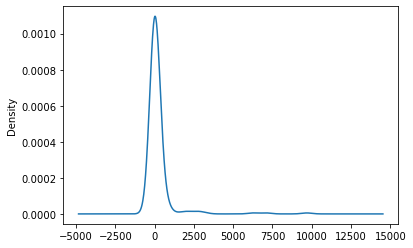

In [40]:
# Visualize the value counts of variety
variety_counts.plot.density()

In [41]:
replace_variety = list(variety_counts[variety_counts <= 300].index)

# Replace in dataframe
for variety in replace_variety:
    WestCoast_wine_data_title.variety = WestCoast_wine_data_title.variety.replace(variety,"Other")
    
# Check to make sure binning was successful
WestCoast_wine_data_title.variety.value_counts()

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Pinot Noir                  9686
Cabernet Sauvignon          7104
Chardonnay                  6265
Other                       4221
Syrah                       3160
Red Blend                   2745
Zinfandel                   2702
Merlot                      2099
Sauvignon Blanc             2063
Bordeaux-style Red Blend    1639
Riesling                     926
Pinot Gris                   785
Petite Sirah                 733
Rosé                         722
Viognier                     684
Rhône-style Red Blend        683
Cabernet Franc               626
Sparkling Blend              593
Grenache                     519
White Blend                  518
Malbec                       511
Sangiovese                   409
Pinot Grigio                 330
Tempranillo                  320
Name: variety, dtype: int64

In [42]:
# Remove varieties where variety count <= 300
WestCoast_wine_data_title = WestCoast_wine_data_title[WestCoast_wine_data_title.variety != "Other"]
print(WestCoast_wine_data_title.shape)
WestCoast_wine_data_title.head()

(45822, 8)


,description,points,price,province,region_1,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou


In [43]:
# Determine value_counts for region binning
region_counts = WestCoast_wine_data_title.region_1.value_counts()
list(region_counts)

[4213,
 3826,
 2987,
 2429,
 2177,
 1948,
 1453,
 1168,
 1084,
 973,
 958,
 885,
 869,
 839,
 796,
 741,
 685,
 679,
 666,
 654,
 642,
 620,
 573,
 538,
 535,
 497,
 433,
 398,
 389,
 377,
 359,
 333,
 332,
 328,
 325,
 317,
 312,
 308,
 307,
 306,
 296,
 281,
 258,
 251,
 246,
 216,
 198,
 190,
 176,
 173,
 167,
 160,
 159,
 155,
 148,
 132,
 132,
 132,
 132,
 130,
 125,
 124,
 123,
 116,
 114,
 113,
 102,
 97,
 93,
 91,
 87,
 83,
 83,
 81,
 80,
 76,
 75,
 72,
 72,
 71,
 70,
 68,
 66,
 66,
 64,
 62,
 61,
 61,
 61,
 55,
 55,
 53,
 52,
 49,
 47,
 46,
 44,
 42,
 39,
 37,
 34,
 34,
 31,
 29,
 26,
 25,
 25,
 24,
 23,
 23,
 22,
 21,
 21,
 21,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 16,
 13,
 13,
 12,
 12,
 12,
 12,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

<AxesSubplot:ylabel='Density'>

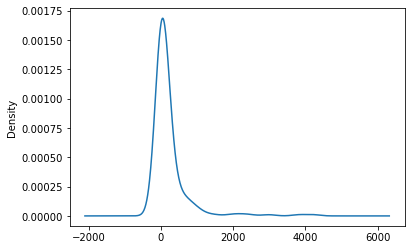

In [44]:
# Visualize the value counts of variety
region_counts.plot.density()

In [45]:
# Reduce regions list using same cut-off that was used for machine learning model.
replace_region = list(region_counts[region_counts <= 300].index)

# Replace in dataframe
for region in replace_region:
    WestCoast_wine_data_title.region_1 = WestCoast_wine_data_title.region_1.replace(region,"Other")
    
# Check to make sure binning was successful
WestCoast_wine_data_title.region_1.value_counts()

Other                    7563
Napa Valley              4213
Columbia Valley          3826
Russian River Valley     2987
California               2429
Willamette Valley        2177
Paso Robles              1948
Sonoma Coast             1453
Sonoma County            1168
Walla Walla Valley       1084
Carneros                  973
Sta. Rita Hills           958
Dry Creek Valley          885
Santa Barbara County      869
Yakima Valley             839
Santa Lucia Highlands     796
Alexander Valley          741
Santa Ynez Valley         685
Lodi                      679
Santa Maria Valley        666
Central Coast             654
Red Mountain              642
Sonoma Valley             620
Anderson Valley           573
Dundee Hills              538
Santa Cruz Mountains      535
Horse Heaven Hills        497
Oregon                    433
Rutherford                398
Livermore Valley          389
Washington                377
Edna Valley               359
Rogue Valley              333
North Coas

In [46]:
# Remove regions where region count <= 300
wine_data_df = WestCoast_wine_data_title[WestCoast_wine_data_title.region_1 != "Other"]
print(wine_data_df.shape)
wine_data_df.head()

(38259, 8)


,description,points,price,province,region_1,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou


## Categorize Wines

In [47]:
# Create wine categories/types column
wine_data_df["type"] = wine_data_df["variety"]

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
# Categorize varieties

rose = ["Rosé"]
red = ["Pinot Noir", "Cabernet Sauvignon", "Syrah", "Red Blend", "Zinfandel", "Merlot","Bordeaux-style Red Blend", 
       "Cabernet Franc", "Rhône-style Red Blend", "Petite Sirah", "Malbec", "Grenache", "Sangiovese", "Tempranillo"]
white = ["Chardonnay", "Sauvignon Blanc","Riesling","Pinot Gris","Viognier", "Sparkling Blend", "Gewürztraminer", 
         "Pinot Grigio", "White Blend"]

wine_data_df = wine_data_df.replace({"type": white},"White")
wine_data_df = wine_data_df.replace({"type": rose},"Pink")
wine_data_df = wine_data_df.replace({"type": red},"Red")
wine_data_df.head()

,description,points,price,province,region_1,title,variety,winery,type
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm,White
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Red
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini,Red
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou,White


In [49]:
# Save cleaned dataframe
# All US data after drop Na
#wine_data_df.to_csv("Data/US_wine_data.csv", index=False)

In [50]:
# Import Dependencies for Database
from config import password
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [51]:
db_string = f"postgresql+psycopg2://postgres:" + password + "@127.0.0.1:5434/WineEnthusiast"

In [52]:
engine = create_engine(db_string)

In [53]:
wine_data_df.to_sql(name='us_wine', con=engine, method='multi')